In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [30]:
dataset=pd.read_csv('heart.csv')

In [31]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
dataset.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

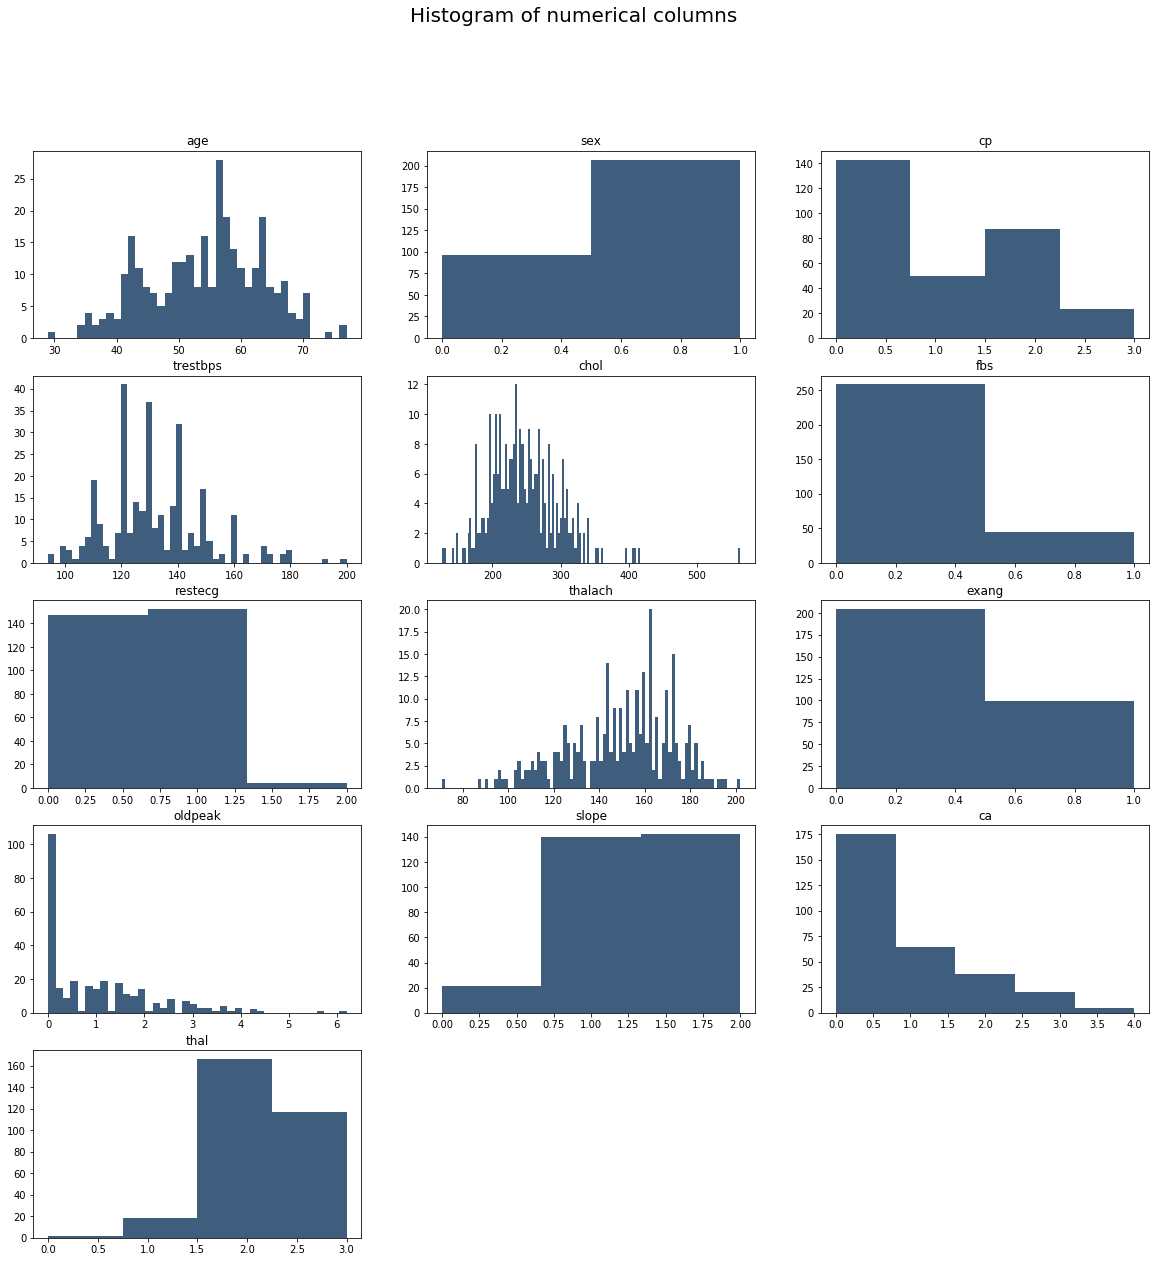

In [33]:
dataset2=dataset.drop(columns=['target'])

plt.figure(figsize=(20,20))
plt.suptitle('Histogram of numerical columns',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(5,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals=np.size(dataset2.iloc[:,i-1].unique())
    
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='#3F5D7D')

In [34]:
y=dataset['target']
X=dataset.drop(columns=['target'])

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
X_train.shape

(242, 13)

In [37]:
X_test.shape

(61, 13)

In [38]:
train_min=X_train.min()
train_range=X_train.max()-train_min
X_train=(X_train-train_min)/train_range

test_min=X_test.min()
test_range=X_test.max()-test_min
X_test=(X_test-test_min)/test_range



In [39]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)

classifier.fit(X_train,y_train)

C:\Users\sanka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_predict=classifier.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix



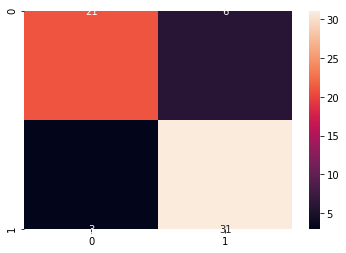

In [41]:
import seaborn as sns
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [42]:
accuracy=accuracy_score(y_test,y_predict)

accuracy

0.8524590163934426